# Statistics Tutorial - Lesson 5
# Linear Regression

[Linear Regression](https://en.wikipedia.org/wiki/Linear_regression) is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables.

In statistics, we are interested in searching relationships amongst variables so that we can understand how several variables are related as well as we can forcast a response. Sometimes outliers, where are not unexpected in the dataset or is way too far from the expected range, can be identified. This process is called [Regression Analysis](https://en.wikipedia.org/wiki/Regression_analysis). 

If there is only one explanatory variable in a linear modelling approach, i.e.
$$ y = mx + c$$

, it is called [Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression); for more than one, the process is called Multiple Linear Regression.

## Simple Linear Regression

Here is a technique to solve Simple Linear Regression is called [Least Square Method](https://en.wikipedia.org/wiki/Linear_least_squares). The procedure is the following:
1. Find means and standard deviation values of x and y data, as well as their correlation coefficient value.
2. Find the slope *m* of the best fitting line by 
$$ m = \rho_{x,y}(\frac{\sigma_y}{\sigma_x}) $$
3. Find the y-intercept *c* of the line by
$$ c = \overline{y} - m\overline{x} $$

In [3]:
import numpy as np

# Source Data
resp_times = [487, 487, 492, 509, 522, 538, 528, 527, 543, 550]
time_index = range(len(resp_times))
    
x_array = np.array(time_index)
y_array = np.array(resp_times)
A = np.vstack([x_array, np.ones(len(x_array))]).T
# using Y = Ap, where A = [[x 1]] and p = [[m], [c]]
m, c = np.linalg.lstsq(A, y_array, rcond=None)[0]

print('Line: y = {m:.2f} * x + {c:.2f}'.format(m=m, c=c))

Line: y = 7.32 * x + 485.38


After calculating m and c, you can draw the best fitting line by Linear Equation.

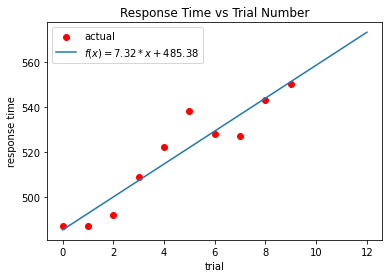

In [4]:
import matplotlib.pyplot as plt

# plot actual
plt.scatter(time_index, stock_prices, c='r', label='actual')

# plot predict
x_func = np.linspace(0, int(len(x_array) *1.2))
y_func = m * x_func + c
plt.plot(x_func, y_func, label='$f(x) = {m:.2f} * x + {c:.2f}$'.format(m=m, c=c))

plt.xlabel('trial')
plt.ylabel('response time')
plt.title('Response Time vs Trial Number')
plt.legend()
plt.show()

## Multiple Linear Regression

The above solves one random variable with $ y = mx + c $. If there are multiple random variables on which y has linear dependency, it can be expressed as
$$ \widehat{Y} = \beta{}_{0} + \beta{}_{1}\cdot X_{1} + \beta{}_{2}\cdot X_{2} + \cdots + \beta{}_{m} \cdot X_{m} $$

The above could be considered as a Matrix problem: $ Y = X \cdot B $ where
$$
X = \left[\begin{array}{cc} 1 & x_{1,1} & x_{2,1} & \cdots & x_{m,1} \\ 1 & x_{1,2} & x_{2,2} & \cdots & x_{m,2} \\ \cdots & \cdots & \cdots & \cdots & \cdots \\ 1 & x_{1,n} & x_{2,n} & \cdots & x_{m,n} \end{array}\right]
$$

$$
B = \left[\begin{array}{cc} \beta{}_{0} \\ \beta{}_{1} \\ \beta{}_{2} \\ \cdots \\ \beta{}_{m} \end{array}\right]
$$

$$
Y = \left[\begin{array}{cc} y_{1} \\ y_{2} \\ \cdots \\ y_{n} \end{array}\right]
$$

We can solve the matrix equation to get B by
$$
B = (X^{T} \cdot X)^{-1} \cdot X^{T} \cdot Y
$$

In [8]:
## Problem Data
x_list = [[5, 7], [6, 6], [7, 4], [8, 5], [9, 6]]
y_list = [10, 20, 60, 40, 50]

# by Linear Regression in NumPy
X_Matrix = np.array(x_list)
Y_Matrix = np.array(y_list)
A_Matrix = np.c_[np.ones(X_Matrix.shape[0]), X_Matrix]
B_Matrix = np.linalg.lstsq(A_Matrix, Y_Matrix, rcond=None)[0]
# Print result
formula  = 'Y = ' + ' + '.join([ '{b:.3f} * X{i}'.format(b=b, i=idx) if idx > 0 else '{b:.3f}'.format(b=b) for idx, b in enumerate(B_Matrix)])
print(formula)

Y = 51.953 + 6.651 * X1 + -11.163 * X2
